# Probability

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3, venn2_circles

from fractions import Fraction
import itertools
from math import factorial
import random

%matplotlib inline

## Basic Definitions
* **trials** - experiments or observations; events where the outcome is unknown
* **sample space** - the set of all possible outcomes of a trial
    * ex. sample space for die is $S = \{1,2,3,4,5,6\}$
    * 1 coin flip: $S = (h,t)$, 2 coin flips: $S = \{(h,h),(h,t),(t,h),(t,t)\}$
* **events** - the specification of the outcome of atrial and can consist of a single outcome or a set of outcomes
    * ex. the event of "heads in flipping one coin" can be specified as $E = \{heads\}$
    * **simple event** - outcome of a single experiment
    * **compound event** - combinations of simple events
* **union** - one or more events occur
    * ex. union of E and F ($E \cup F$) means "either E or F or both occur"
* **intersection** - occurs only if all simple events occur
    * ex. intersection of E and F ($E \cap F$) means "both E and F occur"
* **complement** - everything in the sample space that is not the event
    * ex. written as $E^c$, $\sim {E}$, or $\overline{E}$, read as "not E" or "E complement"
* **mutual exclusivity** - events that cannot occur together
    * ex. E = (salary greater than 100k) F = (salary less than 100k)
* **independence** - the outcome of one trial does not influence the outcome of another
* **permutations** - all possible ways elements in a set can be arranged
    * ex. if a set consists of (a,b,c), permutations are (a,b,c), (a,c,b), (b,a,c), (b,c,a), (c,a,b) and (c,b,a)
* **combinations** - similar to permutaions with the difference that the order of elements is not significant
    * one use of combinations and permuations in statistics is to calculate the number of ways a subset of a specified size can be drawn from a set, which allows the calculation of the probability of drawing any particular subset from a set.
    * using $P$ for permutation and $C$ for combination, the number of permutations drawing 2 elements from a set of 3 is 3P2 and the number of combinations would be 3C2.
    * 3P2 = 6: (a,b),(a,c),(b,c),(b,a),(c,a),(c,b)
    * 3C2 = 3: (a,b),(a,c),(b,c)
    
The number of permutations of subsets of size $k$ drawn from a set of size $n$
$$nPk = \frac{n!}{(n-k)!}$$

The number of combinations of subsets of size $k$ drawn from a set of size $n$
$$nCk = \frac{n!}{k!(n-k)!} = \frac{nPk}{k!}$$
    


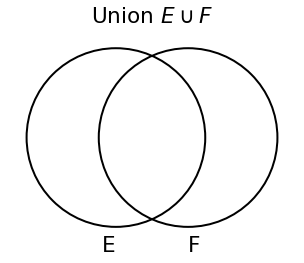

In [137]:
# basic venn diagram
events = {'10': 10, '01': 10, '11': 10}

# union
v = venn2(
    events,
    set_labels=('E','F'),
    set_colors=('white','white')
)

for k in events.keys():
    v.get_label_by_id(k).set_text('')

c = venn2_circles(subsets=(1, 1, 1), linestyle='solid')
plt.title('Union $E \cup F$')
plt.show()

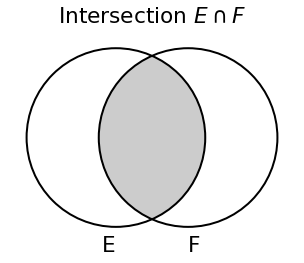

In [138]:
# intersection
v = venn2(
    events,
    set_labels=('E','F'),
    set_colors=('white','white')
)

for k in events.keys():
    v.get_label_by_id(k).set_text('')

c = venn2_circles(subsets=(1, 1, 1), linestyle='solid')
v.get_patch_by_id('11').set_color('grey')
plt.title('Intersection $E \cap F$')
plt.show()

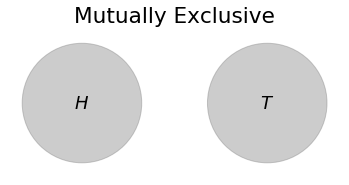

In [119]:
# This is a plt customization to globally
# increase the font size to 22
plt.rcParams.update({'font.size': 18})

# Using v to define a venn diagram with 2 circles. 
# All 3 subsets (event sets) of the sample space set are listed using
# using a dictionary with keys 
# [10 for Ht], [01 for hT] and [11 for HT] 
# By default the set labels are A and B and shown below the circles
# Both sets have been replaced with an empty string denoted by '' 
# There is one element in subset Ht, 1 element in subset hT and no 
# elements in subset HT - as would be expected when the subsets H & T
# are mutually exclusive.

v=venn2(subsets = {'10': 1 , '01': 1, '11': 0}, set_labels = ('', ''))

# Changing the color of the first circle identified by the key 10
# to an ordered RGB triple value.
v.get_patch_by_id('10').set_color('grey')

# Changing the default text shown in the first circle, the cardinality
# of the subset, to the string H
v.get_label_by_id('10').set_text('$H$')

# Changing the default text shown in the first circle, the cardinality
# of the subset, to the string T
v.get_label_by_id('01').set_text('$T$')

# Changing the color of the second circle identified by the key 01
# to an ordered RGB triple value.
v.get_patch_by_id('01').set_color('grey')


plt.title('Mutually Exclusive')
plt.show() #can be used to view the result. 

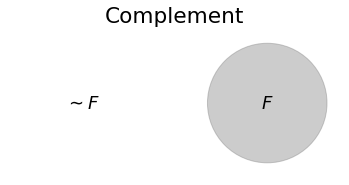

In [139]:
# complement
v=venn2(subsets = {'10': 1, '01': 1, '11': 0}, set_labels = ('', ''))

# LaTeX works well to typset a string
v.get_label_by_id('10').set_text('$\sim F$')
v.get_label_by_id('01').set_text('$F$')

# Set the first set visibility to false with the dictionary key 10 
v.get_patch_by_id('10').set_visible(False)
v.get_patch_by_id('01').set_color('grey')

plt.title('Complement')
plt.show()

In [121]:
def factorial(n):
    '''recursively calculate the factorial'''
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

In [122]:
factorial(5)

120

## Defining Probability
* **probability** - tells us how often something is likely to occur when an expiriment is repeated
    * always between 0 and 1
    * the probability of the sample space is always 1

### Expressing the Probability of an Event
$P(E) = 0.5$
* read as "the probability of event $E$ is 0.5"

$0\leq P(E) \leq 1$
* probability is always between 0 and 1

$P(S)=1$
* the probability of the sample space is always 1

$P(E) + P(E^{\complement}) = 1$
* the probability of an event and its complement is always 1

$P(E^{\complement}) = 1 - P(E)$
* important corollary to above

### Conditional Proability
$P(E|F)$
* **conditional probability** - the probability of an event given that some other event has occured
    * read "the probability of $E$ given $F$"
* **independence** - two variables are said to be independent if $P(E|F) = P(E)$

### Calculating the Probability of Multiple Events

#### union of mutually exclusive events 
$P(E \cap F) = P(E) + P(F)$
* imagine that a college does not allow double majors. english major (E) has a probability of 0.2 and french major (F) has a probability of 0.1.
    * $P(E \cap F) = 0.2 + 0.1 = 0.3$
    
#### union of events that are not mutually exclusive
$P(E \cap F) = P(E) + P(F) - P(E \cup F)$
* same example as above, but where the college does allow double majors. probability that a student double majors ($E \cap F$) is 0.05
    * $P(E \cap F) = 0.2 + 0.1 - 0.05 = 0.25$
    
#### intersection of independent events
$P(E \cap F) = P(E) \times P(F)$
* flipping a fair coin
    * $P(E \cap F) = 0.5 \times 0.5 = 0.25$
    
#### intersection of of nonindependent events
$P(E \cap F) = P(E) \times P(F|E)$
* drawing 2 cards from a standard deck of 52 without replacement. what is the probability of drawing 2 balck cards?
    * $P(E) = P(\text{black card on 1st trail}) = 26/52 = 0.5$
    * $P(F|E) = P(\text{black card on second trial}|\text{black card on 1st trail}) = 26/51 = 0.49$
    * $P(E \cap F) = 0.5 \times 0.49 = 0.245$

## Bayes' Theorem
$$
P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{P(B|A)P(A)}{P(B|A)P(A) + P(B|\sim A)P(\sim A)}
$$
* ex. used to test if a person who tests positive on a screening test for a disease actually has that disease
* Suppose you have a screening test that is 95% effective in detecting disease in those who have the disease and 99% effective in not falsely diagnosing disease in those who are free of it. Clinicians would say that this test has 95% sensitivity and 99% specificity. Suppose also that the rate of disease in the population is 1%. Using the symbols D for disease, $\sim D$ for absence of disease, $T$ for a positive test, and $\sim T$ for a negative test, these probabilities can be stated as:
    * $\text{Sensitivity} = P(T|D) = 0.95$
    * $\text{Specificity} = P(\sim T|\sim D) = 0.99$
    * $\text{Probability of disease in the population} = P(D) = 0.01$
    
* using Bayes' Theorem:
$$P(D|T) = \frac{(0.95)(0.01)}{(0.95)(0.01) + (0.01)(0.99)} = \frac{0.0095}{0.0095 + 0.00099} = 0.4897$$
* illustarates that even with a highly specific and sensitive screening test, if the disease is rare, the false positive rate will be high relative to the true positive rate

## Solving Probability Problems
1. define the trial, experiment, or both
2. define the sample space
3. define the event
4. specify the relevant probabilities and do the calculations

## Exercises
1. what is the probability of drawing a red card from a standard deck of 52 cards
2. getting a number lower than 5 on a single die roll
3. flip a fair coin twice, probability of at least one head
4. draw one card from a deck, probability that it will be a black (clubs or spades) face (king, queen, jack) card
5. draw one card from a deck, probability that it will be a black (clubs or spades) or a face (king, queen, jack) card
6. draw one card from a deck, probability that it will be clubs
7. if order is not significant, how many ways are there to select a subset of 5 students from a classroom of 20
8. Eighty students are attending a conference: 40 boys and 40 girls. Thirty of the boys are majoring in math, as are 20 of the girls. You know that if you pick a boy at random, there is a 75% chance that he is a math major. You want to know, however, if you pick a math major at random, the probability that the student is male?

In [144]:
# helpers
def P(event, space): 
    '''
    The probability of an event, given a sample space of equiprobable outcomes
    '''
    p = Fraction(len(event & space), len(space))
    return p, round(p.numerator/p.denominator,4)

def cross(A, B):
    '''
    The set of ways of concatenating one item from collection A with one from B
    '''
    return {a + b for a in A for b in B}


def coin_flip(p=0.5):
    '''
    simulate a single coin flip
    '''
    return np.random.binomial(1,p)

def combos(items, n):
    '''
    All combinations of n items; each combo as a concatenated str
    '''
    return {' '.join(combo) for combo in itertools.combinations(items, n)}


def choose(n, c):
    '''
    Number of ways to choose c items from a list of n items
    '''
    return factorial(n) // (factorial(n - c) * factorial(c))

In [145]:
# 1.
suits = 'SHDC'
ranks = 'A23456789TJQK'
deck  = cross(ranks, suits)
len(deck)

red = {s for s in deck if s.count('H') or s.count('D')}


P(red,deck)

(Fraction(1, 2), 0.5)

In [146]:
# 2.
d = {1,2,3,4,5,6}

less_than_five = {s for s in d if s < 5}
len(less_than_five)

P(less_than_five,d)

(Fraction(2, 3), 0.6667)

In [147]:
# 4.
suits = 'SHDC'
ranks = 'A23456789TJQK'
deck  = cross(ranks, suits)

outcome = {s for s in deck if (s.count('C') or s.count('S')) & (s.count('J') or s.count('Q') or s.count('K'))}

P(outcome,deck)

(Fraction(3, 26), 0.1154)

In [148]:
# 5. 
suits = 'SHDC'
ranks = 'A23456789TJQK'
deck  = cross(ranks, suits)

outcome = {s for s in deck if (s.count('C') or s.count('S')) | (s.count('J') or s.count('Q') or s.count('K'))}

P(outcome,deck)

(Fraction(8, 13), 0.6154)

In [149]:
# 6.
suits = 'SHDC'
ranks = 'A23456789TJQK'
deck  = cross(ranks, suits)

outcome = {s for s in deck if (s.count('C') or s.count('S')) & (s.count('C'))}

P(outcome,deck)

(Fraction(1, 4), 0.25)

In [143]:
p = 0.5
n = 100
full_results = np.arange(n) #full results

# simulate coin-flips

for i in range(0,n):
    full_results[i] = coin_flip(p)
    
#print results
print(f'probability set to {p}')
print('--------------------------')
#Total up heads and tails for easy user experience 
print(f'Head Count: {np.count_nonzero(full_results == 1)/n}')
print(f'Tail Count: {np.count_nonzero(full_results == 0)/n}')

probability set to 0.5
--------------------------
Head Count: 0.45
Tail Count: 0.55


## More Examples

In [97]:
D    = {1, 2, 3, 4, 5, 6}
even = {2,4,6}

P(even, D)

(Fraction(1, 2), 0.5)

An urn contains 23 balls: 8 white, 6 blue, and 9 red. We select six balls at random (each possible selection is equally likely). What is the probability of each of these possible outcomes:

1. all balls are red
2. 3 are blue, 2 are white, and 1 is red
3. exactly 4 balls are white

In [98]:
urn = cross('W', '12345678') | cross('B', '123456') | cross('R', '123456789') 

urn

{'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'R1',
 'R2',
 'R3',
 'R4',
 'R5',
 'R6',
 'R7',
 'R8',
 'R9',
 'W1',
 'W2',
 'W3',
 'W4',
 'W5',
 'W6',
 'W7',
 'W8'}

In [99]:
U6 = combos(urn, 6)

len(U6)

100947

In [100]:
random.sample(U6, 10)

['R9 W2 R3 R7 R5 W1',
 'R3 R1 B5 R5 B1 R6',
 'R2 W5 W7 W3 R7 R4',
 'B2 R2 R1 R5 B1 R6',
 'R2 W5 W7 B5 W1 R8',
 'W8 R9 B3 W5 R5 B1',
 'W8 B2 R9 R7 W4 R4',
 'W7 B6 W1 B1 R8 R6',
 'W7 R3 R5 B1 R8 R6',
 'R9 R1 B4 W4 B1 R4']

In [101]:
choose(23,6)

100947

In [102]:
# 1.
red6 = {s for s in U6 if s.count('R') == 6}

P(red6, U6)

(Fraction(4, 4807), 0.0008)

In [103]:
# 2.
b3w2r1 = {s for s in U6 if
          s.count('B') == 3 and s.count('W') == 2 and s.count('R') == 1}

P(b3w2r1, U6)

(Fraction(240, 4807), 0.0499)

In [104]:
# 3.
w4 = {s for s in U6 if s.count('W') ==4 }

P(w4,U6)

(Fraction(350, 4807), 0.0728)